# Changing Colorspaces

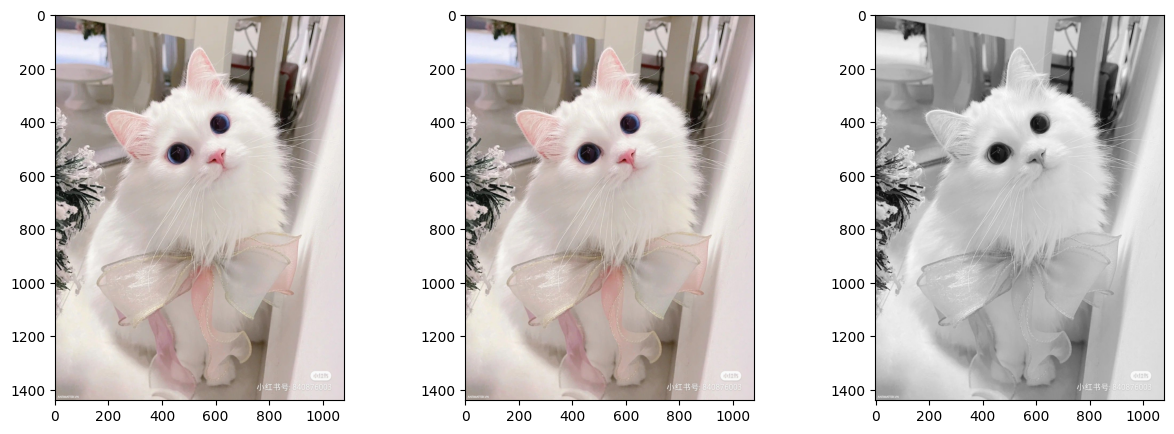

In [108]:
# Changing Color-space
# For color conversion, we use the function cv2.cvtColor(input_image, flag) where flag determines the type of conversion.
# For BGR -> Gray conversion we use the flags cv2.COLOR_BGR2GRAY. 
# For BGR -> HSV, we use the flag cv2.COLOR_BGR2HSV. 

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('1.jpg')

image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=[15,5])

plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(132)
plt.imshow(cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB))

plt.subplot(133)
plt.imshow(cv2.cvtColor(image_gray, cv2.COLOR_GRAY2RGB))

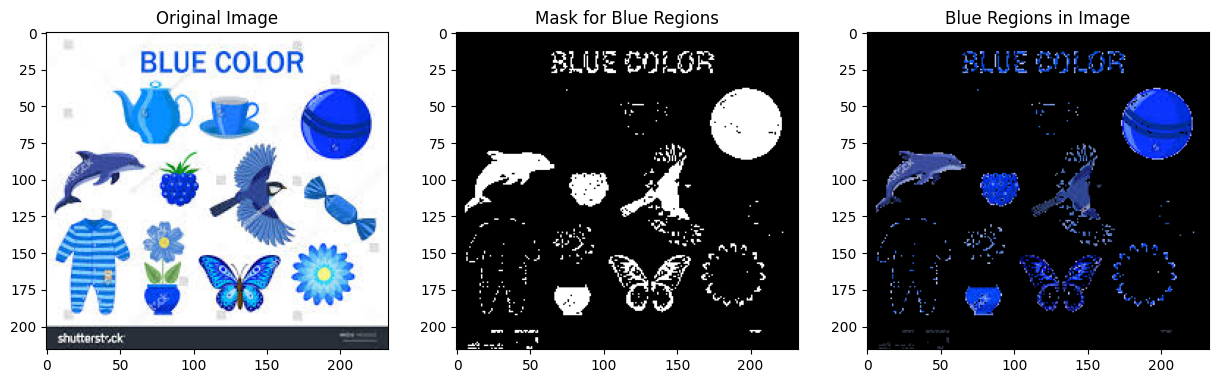

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('blue_image.jpg')
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# ƒê·ªãnh nghƒ©a ph·∫°m vi m√†u xanh lam trong kh√¥ng gian m√†u HSV
# Hue kho·∫£ng t·ª´ 110-130, Saturation v√† Value c√≥ th·ªÉ t√πy ch·ªânh theo nhu c·∫ßu
lower_blue = np.array([110, 50, 50])
upper_blue = np.array([130, 255, 255])

# T·∫°o m·∫∑t n·∫° ƒë·ªÉ ch·ªâ ch·ª©a c√°c v√πng m√†u xanh lam c·ªßa image_hsv
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# √Åp d·ª•ng m·∫∑t n·∫° l√™n h√¨nh ·∫£nh g·ªëc ƒë·ªÉ ch·ªâ hi·ªÉn th·ªã khu v·ª±c m√†u xanh lam
blue_regions = cv2.bitwise_and(image, image, mask=mask)

# Hi·ªÉn th·ªã ·∫£nh g·ªëc v√† ·∫£nh ch·ªâ ch·ª©a v√πng m√†u xanh lam
plt.figure(figsize=[15, 5])

# Hi·ªÉn th·ªã ·∫£nh g·ªëc
plt.subplot(131)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")

# Hi·ªÉn th·ªã m·∫∑t n·∫°
plt.subplot(132)
plt.imshow(mask, cmap='gray')
plt.title("Mask for Blue Regions")

# Hi·ªÉn th·ªã ·∫£nh v·ªõi ch·ªâ v√πng m√†u xanh lam
plt.subplot(133)
plt.imshow(cv2.cvtColor(blue_regions, cv2.COLOR_BGR2RGB))
plt.title("Blue Regions in Image")

plt.show()

In [41]:
# x√°c ƒë·ªãnh ph·∫°m vi m√†u trong kh√¥ng gian HSV
blue = np.uint8([[[255, 0, 0]]])
hsv_blue = cv2.cvtColor(blue, cv2.COLOR_BGR2HSV)
print(hsv_blue)

# l·∫•y [H-10, 100,100] v√† [H+10, 255, 255] nh∆∞ gi·ªõi h·∫°n d∆∞·ªõi v√† gi·ªõi h·∫°n tr√™n

[[[120 255 255]]]


# Image Thresholding

Image Thresholding l√† m·ªôt k·ªπ thu·∫≠t x·ª≠ l√Ω ·∫£nh nh·∫±m ph√¢n ƒëo·∫°n h√¨nh ·∫£nh th√†nh c√°c v√πng d·ª±a tr√™n ƒë·ªô s√°ng c·ªßa pixel. √ù t∆∞·ªüng ch√≠nh l√† ch·ªçn m·ªôt gi√° tr·ªã ng∆∞·ª°ng (threshold value) v√† g√°n m·ªôt gi√° tr·ªã m·ªõi cho c√°c pixel d·ª±a tr√™n vi·ªác ch√∫ng c√≥ l·ªõn h∆°n hay nh·ªè h∆°n gi√° tr·ªã ng∆∞·ª°ng ƒë√≥.

C√°c k·ªπ thu·∫≠t thresholding th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ph√¢n bi·ªát ƒë·ªëi t∆∞·ª£ng (foreground) kh·ªèi n·ªÅn (background) trong c√°c h√¨nh ·∫£nh grayscale.

C√°c lo·∫°i Thresholding c∆° b·∫£n
1. Simple Thresholding: ƒê∆°n gi·∫£n nh·∫•t l√† ch·ªçn m·ªôt gi√° tr·ªã ng∆∞·ª°ng c·ªë ƒë·ªãnh. Pixel n√†o c√≥ gi√° tr·ªã l·ªõn h∆°n ng∆∞·ª°ng s·∫Ω ƒë∆∞·ª£c g√°n m·ªôt gi√° tr·ªã m·ªõi (th∆∞·ªùng l√† m√†u tr·∫Øng - 255), c√≤n l·∫°i s·∫Ω ƒë∆∞·ª£c g√°n m√†u ƒëen (0).
2. Adaptive Thresholding: Khi h√¨nh ·∫£nh c√≥ c√°c v√πng s√°ng t·ªëi kh√¥ng ƒë·ªìng ƒë·ªÅu, adaptive thresholding gi√∫p ch·ªçn gi√° tr·ªã ng∆∞·ª°ng kh√°c nhau cho c√°c ph·∫ßn nh·ªè c·ªßa ·∫£nh d·ª±a tr√™n c√°c t√≠nh to√°n c·ª•c b·ªô (local).
3. Otsu's Binarization: ƒê√¢y l√† ph∆∞∆°ng ph√°p t·ª± ƒë·ªông t√¨m ra gi√° tr·ªã ng∆∞·ª°ng t·ªëi ∆∞u ƒë·ªÉ ph√¢n ƒëo·∫°n ·∫£nh, ƒë·∫∑c bi·ªát h·ªØu √≠ch khi histogram c·ªßa ·∫£nh c√≥ 2 ƒë·ªânh (·∫£nh c√≥ hai v√πng s√°ng v√† t·ªëi r√µ r·ªát).

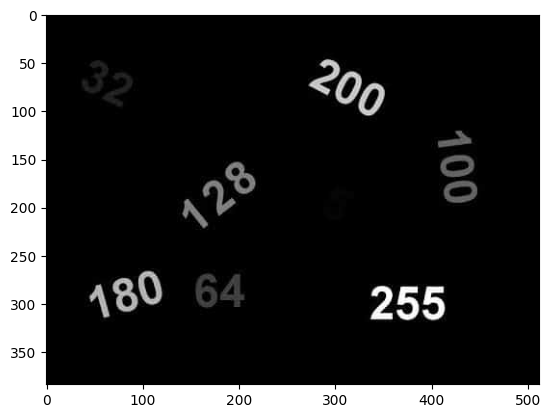

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('thresh_image.jpg')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [43]:
print(image.shape)

(384, 512, 3)


Ng∆∞·ª°ng nh·ªã ph√¢n


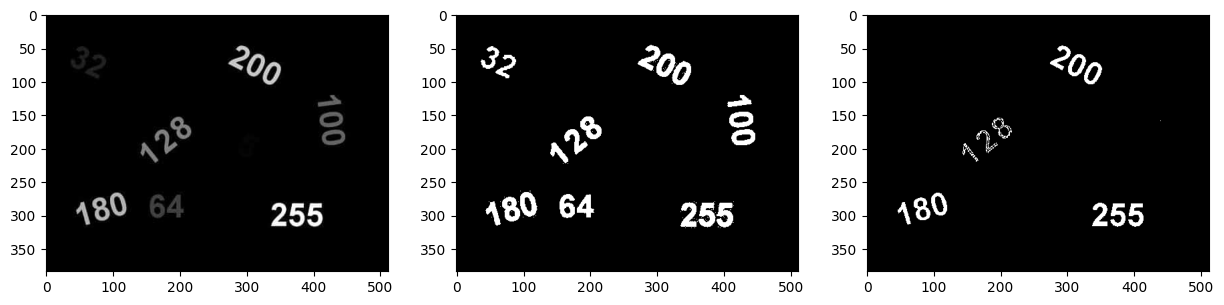

In [44]:
# if src(x,y) > thresh -->  dst(x,y) = maxValue
# else -->  dst(x,y) = 0

thresh_0 = 20
maxValue = 255
_, dst_0_255 = cv2.threshold(image, thresh_0, maxValue, cv2.THRESH_BINARY)

thresh_128 = 128
_, dst_128_255 = cv2.threshold(image, thresh_128, maxValue, cv2.THRESH_BINARY)

plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(dst_0_255, cmap='gray')
plt.subplot(133)
plt.imshow(dst_128_255, cmap='gray')

plt.show()

Ng∆∞·ª°ng nh·ªã ph√¢n ngh·ªãch ƒë·∫£o


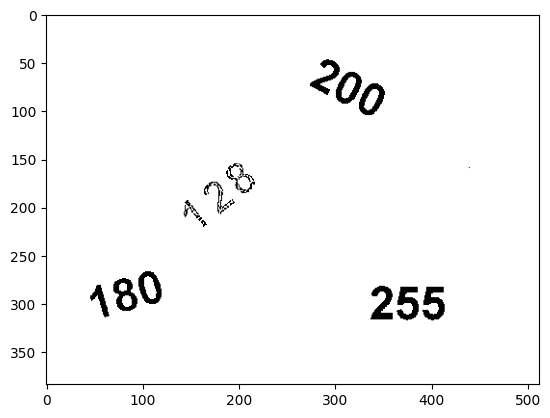

In [45]:
thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_BINARY_INV)
plt.imshow(dst, cmap='gray')

Ng∆∞·ª°ng c·∫Øt b·ªõt ( THRESH_TRUNC )


127.0


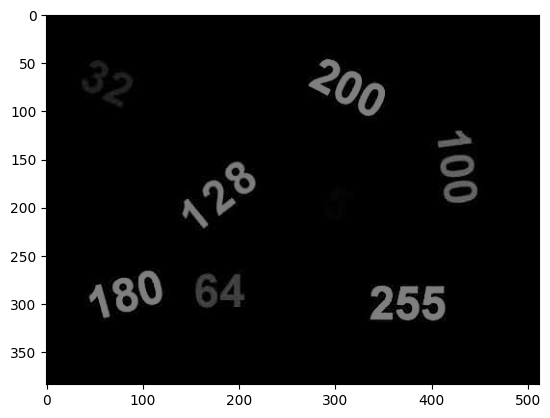

In [46]:
# if src(x,y) > thresh
#   dst(x,y) = thresh
# else
#   dst(x,y) = src(x,y)
# Tr√™n ng∆∞·ª°ng th√¨ ƒë∆∞a v·ªÅ ng∆∞·ª°ng, d∆∞·ªõi ng∆∞·ª°ng th√¨ gi·ªØ nguy√™n

thresh = 127
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TRUNC)
print(th)
plt.imshow(dst, cmap='gray')

Ng∆∞·ª°ng v·ªÅ 0 ( THRESH_TOZERO )


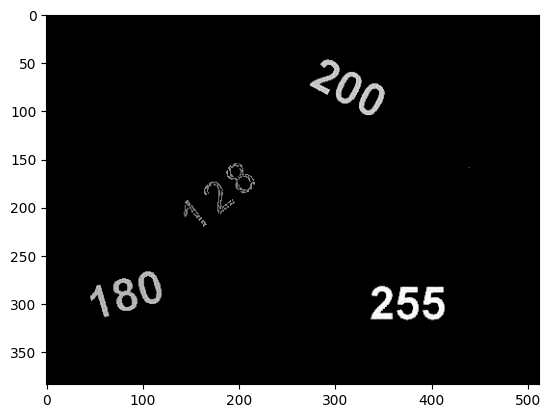

In [47]:
# if src(x,y) > thresh
#   dst(x,y) = src(x,y)
# else
#   dst(x,y) = 0
# Tr√™n ng∆∞·ª°ng th√¨ gi·ªØ nguy√™n, d∆∞·ªõi ng∆∞·ª°ng th√¨ v·ªÅ 0

thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TOZERO)
plt.imshow(dst, cmap='gray')

Ng∆∞·ª°ng ƒë·∫£o ng∆∞·ª£c v·ªÅ 0 ( THRESH_TOZERO_INV )


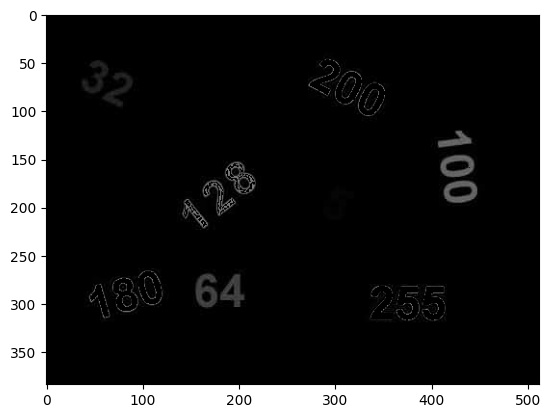

In [48]:
# if src(x,y) > thresh
#   dst(x,y) = 0
# else
#   dst(x,y) = src(x,y)
# Tr√™n ng∆∞·ª°ng th√¨ v·ªÅ 0, d∆∞·ªõi ng∆∞·ª°ng th√¨ gi·ªØ nguy√™n

thresh = 128
maxValue = 255
th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TOZERO_INV)
plt.imshow(dst, cmap='gray')

Ng∆∞·ª°ng th√≠ch ·ª©ng


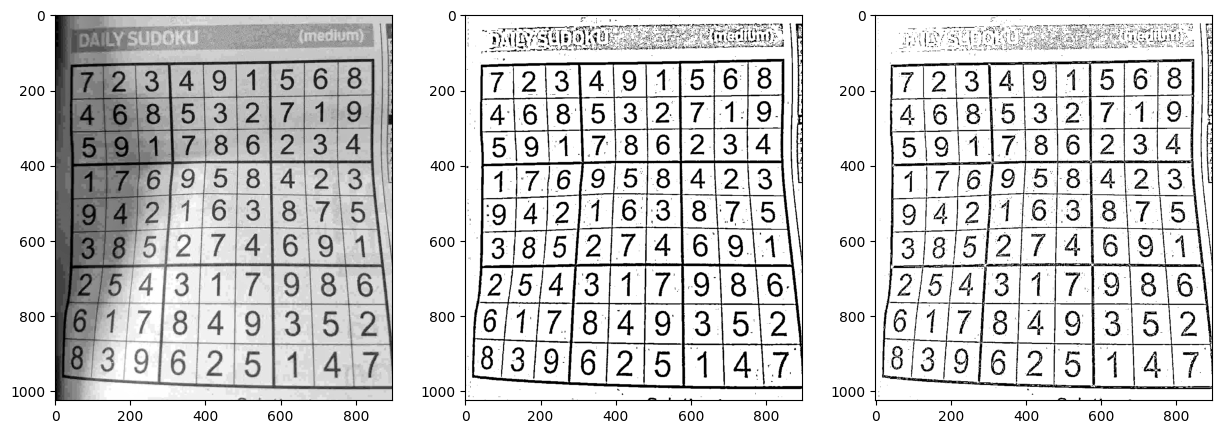

In [54]:
# Thu·∫≠t to√°n t√≠nh ng∆∞·ª°ng s·∫Ω t√≠nh gi√° tr·ªã ng∆∞·ª°ng cho m·ªói pixel ho·∫∑c m·ªói v√πng nh·ªè, t·ª©c l√† trong c√πng m·ªôt ·∫£nh s·∫Ω c√≥ gi√° tr·ªã ng∆∞·ª°ng kh√°c nhau cho 
# c√°c v√πng/pixel kh√°c nhau. V√† n√≥ mang l·∫°i hi·ªáu qu·∫£ t·ªët cho nh·ªØng ·∫£nh c√≥ nhi·ªÅu ƒë·ªô s√°ng kh√°c nhau.
#
# Adaptive Method - It decides how thresholding value is calculated.
#     --> cv2.ADAPTIVE_THRESH_MEAN_C : threshold value is the mean of neighbourhood area.    
#     --> cv2.ADAPTIVE_THRESH_GAUSSIAN_C : threshold value is the weighted sum of neighbourhood values where weights are a gaussian window
#
# Block Size - It decides the size of neighbourhood area 
# 
# C - It is just a constant which is subtracted from the mean or weighted mean caculate

import cv2
import matplotlib.pyplot as plt

image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

blockSize = 15

C = 15

image_median = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize, C)
image_gauss = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blockSize, C)

plt.figure(figsize=[15, 5])

plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(image_median, cmap='gray')
plt.subplot(133)
plt.imshow(image_gauss, cmap='gray')

plt.show()

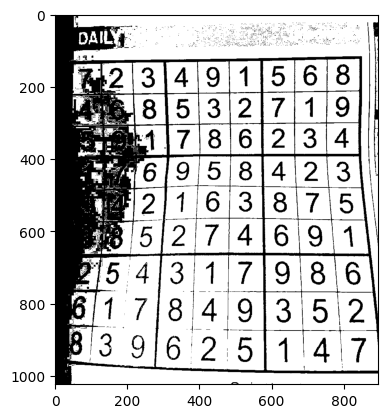

In [50]:
_, dst = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
plt.imshow(dst, cmap='gray')

Ng∆∞·ª°ng Otsu

Ng∆∞·ª°ng Otsu ho·∫°t ƒë·ªông d·ª±a tr√™n nguy√™n t·∫Øc t·ªëi ∆∞u h√≥a gi·ªØa c√°c l·ªõp (inter-class variance) c·ªßa m·ª©c x√°m trong ·∫£nh. M·ª•c ti√™u l√† t√¨m ra m·ªôt ng∆∞·ª°ng gi√° tr·ªã ùë° m√† t·∫°i ƒë√≥ ƒë·ªô l·ªách gi·ªØa c√°c l·ªõp (foreground v√† background) l√† l·ªõn nh·∫•t. C√°ch th·ª±c hi·ªán c·ª• th·ªÉ nh∆∞ sau:

1. T√≠nh Histogram: T·∫°o m·ªôt histogram c·ªßa ·∫£nh, th·ªÉ hi·ªán t·∫ßn s·ªë xu·∫•t hi·ªán c·ªßa c√°c m·ª©c x√°m t·ª´ 0 ƒë·∫øn 255.

2. T√≠nh X√°c Su·∫•t T√≠ch L≈©y: X√°c ƒë·ªãnh x√°c su·∫•t t√≠ch l≈©y v√† gi√° tr·ªã trung b√¨nh t√≠ch l≈©y cho m·ªói m·ª©c x√°m.

3. T√≠nh ƒê·ªô L·ªách Gi·ªØa C√°c L·ªõp: S·ª≠ d·ª•ng c√°c gi√° tr·ªã x√°c su·∫•t v√† trung b√¨nh t√≠ch l≈©y ƒë·ªÉ t√≠nh to√°n ƒë·ªô l·ªách gi·ªØa c√°c l·ªõp cho m·ªói ng∆∞·ª°ng gi√° tr·ªã ùë°.

4. Ch·ªçn Ng∆∞·ª°ng T·ªëi ∆Øu: T√¨m gi√° tr·ªã ng∆∞·ª°ng ùë° m√† t·∫°i ƒë√≥ ƒë·ªô l·ªách gi·ªØa c√°c l·ªõp l√† l·ªõn nh·∫•t.

X√°c su·∫•t t√≠ch l≈©y t·∫°i m·ª©c x√°m k theo c√¥ng th·ª©c P(k) = ‚àë(i=0 -> k) H(i) / N trong ƒë√≥ n l√† t·ªïng s·ªë pixel

Gi√° tr·ªã trung b√¨nh t√≠ch l≈©y t·∫°i m·ª©c x√°m k theo c√¥ng th·ª©c Œº(k) = ‚àë(i=0 -> k) i * H(i) / N

Text(0.5, 1.0, 'Original histogram')

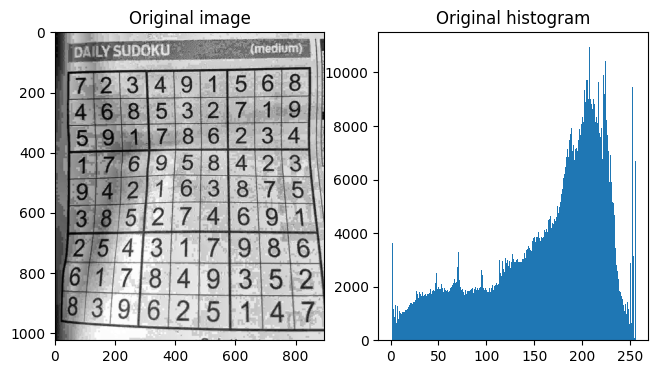

In [91]:
image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # clipLimit = 2.0 c√≥ √Ω nghƒ©a n·∫øu m·ªói title c√≥ 256 ƒëi·ªÉm ·∫£nh 
                                                           # th√¨ contrast limiting l√† 2.0 * 256 / 256 = 2

plt.figure(figsize=[16,4])

image = clahe.apply(image)
plt.subplot(141); plt.imshow(image, cmap='gray'); plt.title('Original image')
plt.subplot(142);plt.hist(image.ravel(),256,[0,256]); plt.title('Original histogram')

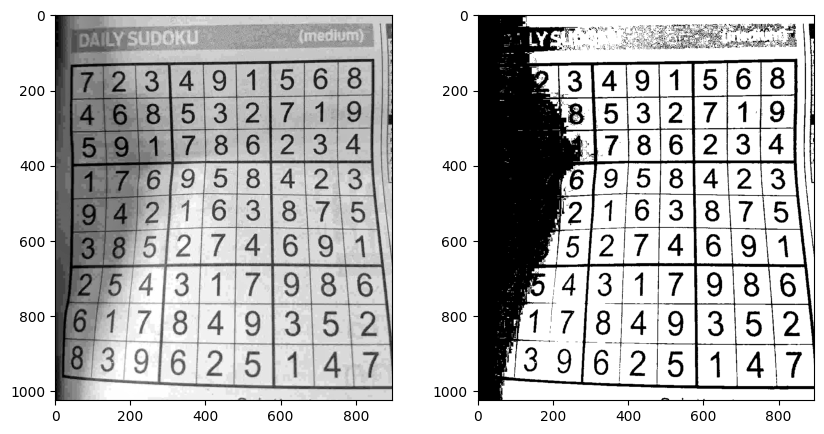

In [89]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('adaptive_thresh.jpg', cv2.IMREAD_GRAYSCALE)

# √Åp d·ª•ng ng∆∞·ª°ng Otsu
# L∆∞u √Ω r·∫±ng n√™n truy·ªÅn gi√° tr·ªã ng∆∞·ª°ng ban ƒë·∫ßu b·∫±ng 0
# v√† ch·ªâ ƒë·ªãnh lo·∫°i ph√¢n ng∆∞·ª°ng b·∫±ng cv2.THRESH_BINARY + cv2.THRESH_OTSU
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(otsu_thresh, cmap='gray')
plt.show()

Text(0.5, 1.0, 'Original histogram')

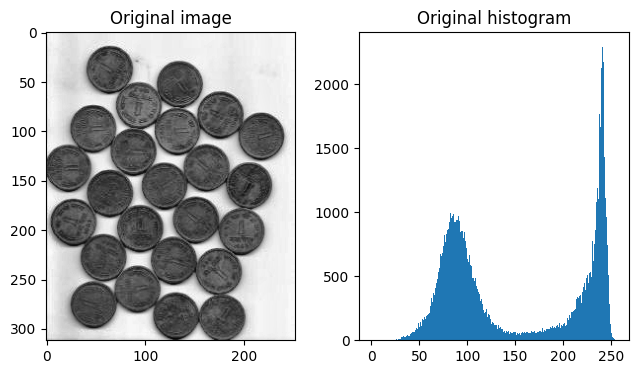

In [92]:
image = cv2.imread('water_coins.jpg', cv2.IMREAD_GRAYSCALE)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8)) # clipLimit = 2.0 c√≥ √Ω nghƒ©a n·∫øu m·ªói title c√≥ 256 ƒëi·ªÉm ·∫£nh 
                                                           # th√¨ contrast limiting l√† 2.0 * 256 / 256 = 2

plt.figure(figsize=[16,4])

image = clahe.apply(image)
plt.subplot(141); plt.imshow(image, cmap='gray'); plt.title('Original image')
plt.subplot(142);plt.hist(image.ravel(),256,[0,256]); plt.title('Original histogram')

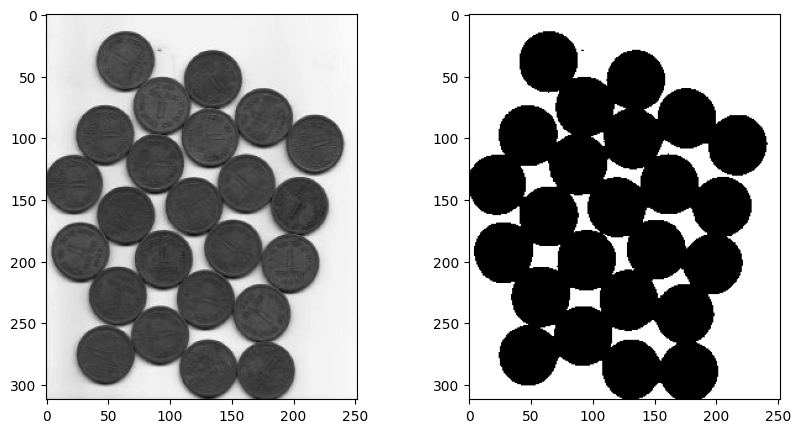

In [93]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('water_coins.jpg', cv2.IMREAD_GRAYSCALE)

# √Åp d·ª•ng ng∆∞·ª°ng Otsu
# L∆∞u √Ω r·∫±ng n√™n truy·ªÅn gi√° tr·ªã ng∆∞·ª°ng ban ƒë·∫ßu b·∫±ng 0
# v√† ch·ªâ ƒë·ªãnh lo·∫°i ph√¢n ng∆∞·ª°ng b·∫±ng cv2.THRESH_BINARY + cv2.THRESH_OTSU
_, otsu_thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=[10, 5])
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.subplot(122)
plt.imshow(otsu_thresh, cmap='gray')
plt.show()

# Smoothing Images

2D Convolution ( Image Filtering )

**Image Blurring (Image Smoothing)**

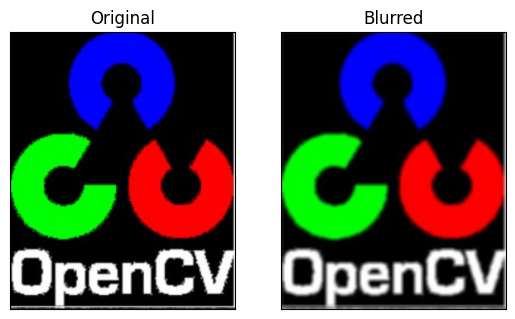

In [88]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('blur1.png')
assert img is not None, "file could not be read, check with os.path.exists()"
 
blur = cv.blur(img,(5,5))
 
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**Gaussian Blurring**

Trong ph∆∞∆°ng ph√°p n√†y, thay v√¨ b·ªô l·ªçc h·ªôp, m·ªôt h·∫°t nh√¢n Gaussian ƒë∆∞·ª£c s·ª≠ d·ª•ng. N√≥ ƒë∆∞·ª£c th·ª±c hi·ªán v·ªõi h√†m cv.GaussianBlur() . Ch√∫ng ta n√™n ch·ªâ ƒë·ªãnh chi·ªÅu r·ªông v√† chi·ªÅu cao c·ªßa h·∫°t nh√¢n, ph·∫£i l√† s·ªë d∆∞∆°ng v√† s·ªë l·∫ª. Ch√∫ng ta c≈©ng n√™n ch·ªâ ƒë·ªãnh ƒë·ªô l·ªách chu·∫©n theo h∆∞·ªõng X v√† Y, t∆∞∆°ng ·ª©ng l√† sigmaX v√† sigmaY. N·∫øu ch·ªâ ch·ªâ ƒë·ªãnh sigmaX, sigmaY ƒë∆∞·ª£c coi l√† gi·ªëng nh∆∞ sigmaX. N·∫øu c·∫£ hai ƒë·ªÅu ƒë∆∞·ª£c ƒë∆∞a ra d∆∞·ªõi d·∫°ng s·ªë kh√¥ng, ch√∫ng ƒë∆∞·ª£c t√≠nh to√°n t·ª´ k√≠ch th∆∞·ªõc h·∫°t nh√¢n. L√†m m·ªù Gaussian r·∫•t hi·ªáu qu·∫£ trong vi·ªác lo·∫°i b·ªè nhi·ªÖu Gaussian kh·ªèi h√¨nh ·∫£nh.



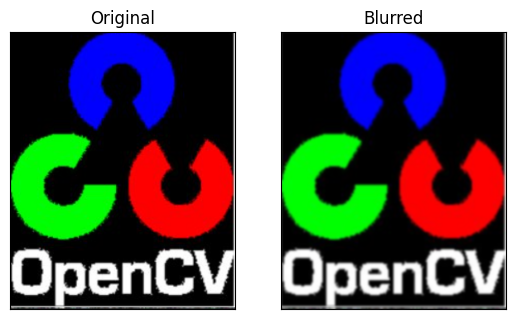

In [86]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('blur1.png')
assert img is not None, "file could not be read, check with os.path.exists()"
 
blur = cv.GaussianBlur (img,(5,5),0)
 
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**Median Blurring**

·ªû ƒë√¢y, h√†m cv.medianBlur() l·∫•y gi√° tr·ªã trung b√¨nh c·ªßa t·∫•t c·∫£ c√°c pixel b√™n d∆∞·ªõi v√πng h·∫°t nh√¢n v√† ph·∫ßn t·ª≠ trung t√¢m ƒë∆∞·ª£c thay th·∫ø b·∫±ng gi√° tr·ªã trung b√¨nh n√†y. ƒêi·ªÅu n√†y r·∫•t hi·ªáu qu·∫£ ƒë·ªëi v·ªõi nhi·ªÖu mu·ªëi v√† ti√™u trong m·ªôt h√¨nh ·∫£nh. ƒêi·ªÅu th√∫ v·ªã l√† trong c√°c b·ªô l·ªçc tr√™n, ph·∫ßn t·ª≠ trung t√¢m l√† m·ªôt gi√° tr·ªã m·ªõi ƒë∆∞·ª£c t√≠nh to√°n c√≥ th·ªÉ l√† m·ªôt gi√° tr·ªã pixel trong h√¨nh ·∫£nh ho·∫∑c m·ªôt gi√° tr·ªã m·ªõi. Nh∆∞ng trong l√†m m·ªù trung b√¨nh, ph·∫ßn t·ª≠ trung t√¢m lu√¥n ƒë∆∞·ª£c thay th·∫ø b·∫±ng m·ªôt s·ªë gi√° tr·ªã pixel trong h√¨nh ·∫£nh. N√≥ l√†m gi·∫£m nhi·ªÖu hi·ªáu qu·∫£. K√≠ch th∆∞·ªõc h·∫°t nh√¢n c·ªßa n√≥ ph·∫£i l√† m·ªôt s·ªë nguy√™n l·∫ª d∆∞∆°ng.

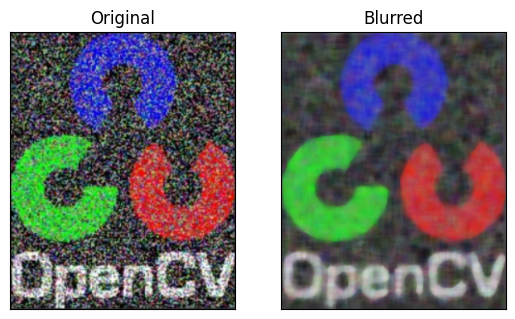

In [82]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('blur2.png')
assert img is not None, "file could not be read, check with os.path.exists()"
blur = cv.medianBlur (img,11) 
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**Bilateral Filtering**


cv.bilateralFilter() c√≥ hi·ªáu qu·∫£ cao trong vi·ªác lo·∫°i b·ªè nhi·ªÖu trong khi v·∫´n gi·ªØ cho c√°c c·∫°nh s·∫Øc n√©t. Nh∆∞ng thao t√°c n√†y ch·∫≠m h∆°n so v·ªõi c√°c b·ªô l·ªçc kh√°c. Ch√∫ng ta ƒë√£ th·∫•y r·∫±ng b·ªô l·ªçc Gaussian l·∫•y v√πng l√¢n c·∫≠n xung quanh ƒëi·ªÉm ·∫£nh v√† t√¨m gi√° tr·ªã trung b√¨nh c√≥ tr·ªçng s·ªë Gaussian c·ªßa n√≥. B·ªô l·ªçc Gaussian n√†y l√† m·ªôt h√†m c·ªßa kh√¥ng gian ri√™ng, nghƒ©a l√†, c√°c ƒëi·ªÉm ·∫£nh g·∫ßn ƒë√≥ ƒë∆∞·ª£c xem x√©t trong khi l·ªçc. N√≥ kh√¥ng xem x√©t li·ªáu c√°c ƒëi·ªÉm ·∫£nh c√≥ c∆∞·ªùng ƒë·ªô g·∫ßn nh∆∞ gi·ªëng nhau hay kh√¥ng. N√≥ kh√¥ng xem x√©t li·ªáu m·ªôt ƒëi·ªÉm ·∫£nh c√≥ ph·∫£i l√† ƒëi·ªÉm ·∫£nh c·∫°nh hay kh√¥ng. V√¨ v·∫≠y, n√≥ c≈©ng l√†m m·ªù c√°c c·∫°nh, ƒëi·ªÅu m√† ch√∫ng ta kh√¥ng mu·ªën l√†m.

L·ªçc song ph∆∞∆°ng c≈©ng s·ª≠ d·ª•ng b·ªô l·ªçc Gaussian trong kh√¥ng gian, nh∆∞ng th√™m m·ªôt b·ªô l·ªçc Gaussian n·ªØa l√† h√†m c·ªßa s·ª± kh√°c bi·ªát v·ªÅ pixel. H√†m Gaussian c·ªßa kh√¥ng gian ƒë·∫£m b·∫£o r·∫±ng ch·ªâ nh·ªØng pixel g·∫ßn ƒë√≥ m·ªõi ƒë∆∞·ª£c xem x√©t ƒë·ªÉ l√†m m·ªù, trong khi h√†m Gaussian c·ªßa s·ª± kh√°c bi·ªát v·ªÅ c∆∞·ªùng ƒë·ªô ƒë·∫£m b·∫£o r·∫±ng ch·ªâ nh·ªØng pixel c√≥ c∆∞·ªùng ƒë·ªô t∆∞∆°ng t·ª± nh∆∞ pixel trung t√¢m m·ªõi ƒë∆∞·ª£c xem x√©t ƒë·ªÉ l√†m m·ªù. V√¨ v·∫≠y, n√≥ b·∫£o to√†n c√°c c·∫°nh v√¨ c√°c pixel ·ªü c√°c c·∫°nh s·∫Ω c√≥ s·ª± thay ƒë·ªïi c∆∞·ªùng ƒë·ªô l·ªõn.

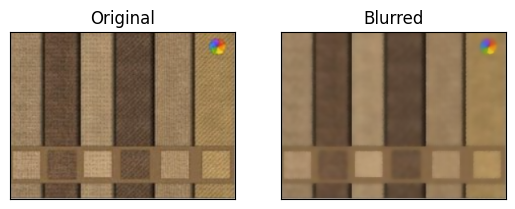

In [76]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
 
img = cv.imread('Bilateral_Filtering.png')
assert img is not None, "file could not be read, check with os.path.exists()"
blur =  cv.bilateralFilter (img,9,75,75)

plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB)),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# Image Gradients

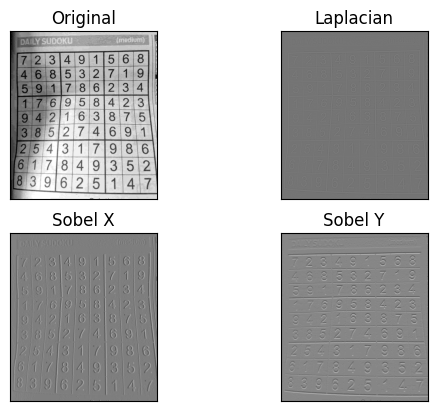

In [103]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('adaptive_thresh.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
 
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=3)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=3)
 
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
 
plt.show()


# Canny Edge Detection

Canny Edge Detection l√† m·ªôt thu·∫≠t to√°n ph√°t hi·ªán c·∫°nh ph·ªï bi·∫øn. N√≥ ƒë∆∞·ª£c ph√°t tri·ªÉn b·ªüi John F. Canny v√†o nƒÉm

1. ƒê√¢y l√† thu·∫≠t to√°n nhi·ªÅu giai ƒëo·∫°n v√† ch√∫ng ta s·∫Ω th·ª±c hi·ªán t·ª´ng giai ƒëo·∫°n.
2. Noise Reduction

V√¨ ph√°t hi·ªán c·∫°nh d·ªÖ b·ªã nhi·ªÖu trong ·∫£nh, b∆∞·ªõc ƒë·∫ßu ti√™n l√† lo·∫°i b·ªè nhi·ªÖu trong ·∫£nh b·∫±ng b·ªô l·ªçc Gaussian 5x5. 

3. T√¨m c∆∞·ªùng ƒë·ªô Gradient c·ªßa h√¨nh ·∫£nh

Sau ƒë√≥, h√¨nh ·∫£nh ƒë∆∞·ª£c l√†m m·ªãn ƒë∆∞·ª£c l·ªçc b·∫±ng h·∫°t nh√¢n Sobel theo c·∫£ h∆∞·ªõng ngang v√† h∆∞·ªõng d·ªçc ƒë·ªÉ c√≥ ƒë∆∞·ª£c ƒë·∫°o h√†m ƒë·∫ßu ti√™n theo h∆∞·ªõng ngang (Gx) v√† h∆∞·ªõng th·∫≥ng ƒë·ª©ng (Gy). T·ª´ hai h√¨nh ·∫£nh n√†y, ch√∫ng ta c√≥ th·ªÉ t√¨m ra ƒë·ªô d·ªëc c·∫°nh v√† h∆∞·ªõng cho t·ª´ng ƒëi·ªÉm ·∫£nh nh∆∞ sau:

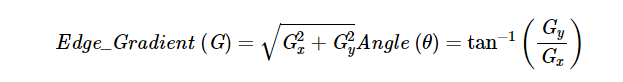

H∆∞·ªõng gradient lu√¥n vu√¥ng g√≥c v·ªõi c√°c c·∫°nh. N√≥ ƒë∆∞·ª£c l√†m tr√≤n th√†nh m·ªôt trong b·ªën g√≥c bi·ªÉu th·ªã h∆∞·ªõng d·ªçc, h∆∞·ªõng ngang v√† hai h∆∞·ªõng ch√©o.

**Non-maximum Suppression**

Sau khi c√≥ ƒë∆∞·ª£c ƒë·ªô l·ªõn v√† h∆∞·ªõng c·ªßa gradient, m·ªôt l·∫ßn qu√©t to√†n b·ªô h√¨nh ·∫£nh ƒë∆∞·ª£c th·ª±c hi·ªán ƒë·ªÉ lo·∫°i b·ªè b·∫•t k·ª≥ pixel kh√¥ng mong mu·ªën n√†o c√≥ th·ªÉ kh√¥ng t·∫°o th√†nh c·∫°nh. ƒê·ªëi v·ªõi ƒëi·ªÅu n√†y, t·∫°i m·ªói pixel, pixel ƒë∆∞·ª£c ki·ªÉm tra xem n√≥ c√≥ ph·∫£i l√† gi√° tr·ªã c·ª±c ƒë·∫°i c·ª•c b·ªô trong v√πng l√¢n c·∫≠n c·ªßa n√≥ theo h∆∞·ªõng c·ªßa gradient hay kh√¥ng. Ki·ªÉm tra h√¨nh ·∫£nh b√™n d∆∞·ªõi:

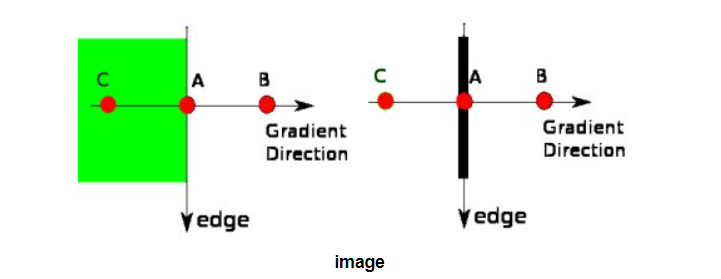

ƒêi·ªÉm A n·∫±m tr√™n c·∫°nh (theo h∆∞·ªõng th·∫≥ng ƒë·ª©ng). H∆∞·ªõng gradient vu√¥ng g√≥c v·ªõi c·∫°nh. ƒêi·ªÉm B v√† C theo h∆∞·ªõng gradient. V√¨ v·∫≠y, ƒëi·ªÉm A ƒë∆∞·ª£c ki·ªÉm tra v·ªõi ƒëi·ªÉm B v√† C ƒë·ªÉ xem li·ªáu n√≥ c√≥ t·∫°o th√†nh c·ª±c ƒë·∫°i c·ª•c b·ªô hay kh√¥ng. N·∫øu c√≥, n√≥ ƒë∆∞·ª£c xem x√©t cho giai ƒëo·∫°n ti·∫øp theo, n·∫øu kh√¥ng, n√≥ s·∫Ω b·ªã lo·∫°i b·ªè (ƒë·∫∑t v·ªÅ 0).

N√≥i t√≥m l·∫°i, k·∫øt qu·∫£ b·∫°n nh·∫≠n ƒë∆∞·ª£c l√† m·ªôt h√¨nh ·∫£nh nh·ªã ph√¢n c√≥ "c√°c c·∫°nh m·ªèng".

**Ng∆∞·ª°ng tr·ªÖ**

Giai ƒëo·∫°n n√†y quy·∫øt ƒë·ªãnh t·∫•t c·∫£ c√°c c·∫°nh n√†o th·ª±c s·ª± l√† c·∫°nh v√† c·∫°nh n√†o kh√¥ng. ƒê·ªëi v·ªõi ƒëi·ªÅu n√†y, ch√∫ng ta c·∫ßn hai gi√° tr·ªã ng∆∞·ª°ng, minVal v√† maxVal. B·∫•t k·ª≥ c·∫°nh n√†o c√≥ ƒë·ªô d·ªëc c∆∞·ªùng ƒë·ªô l·ªõn h∆°n maxVal ch·∫Øc ch·∫Øn l√† c·∫°nh v√† nh·ªØng c·∫°nh d∆∞·ªõi minVal ch·∫Øc ch·∫Øn l√† kh√¥ng ph·∫£i c·∫°nh, do ƒë√≥ b·ªã lo·∫°i b·ªè. Nh·ªØng c·∫°nh n·∫±m gi·ªØa hai ng∆∞·ª°ng n√†y ƒë∆∞·ª£c ph√¢n lo·∫°i l√† c·∫°nh ho·∫∑c kh√¥ng ph·∫£i c·∫°nh d·ª±a tr√™n kh·∫£ nƒÉng k·∫øt n·ªëi c·ªßa ch√∫ng. N·∫øu ch√∫ng ƒë∆∞·ª£c k·∫øt n·ªëi v·ªõi c√°c pixel "sure-edge", ch√∫ng ƒë∆∞·ª£c coi l√† m·ªôt ph·∫ßn c·ªßa c√°c c·∫°nh. N·∫øu kh√¥ng, ch√∫ng c≈©ng b·ªã lo·∫°i b·ªè. Xem h√¨nh ·∫£nh b√™n d∆∞·ªõi:

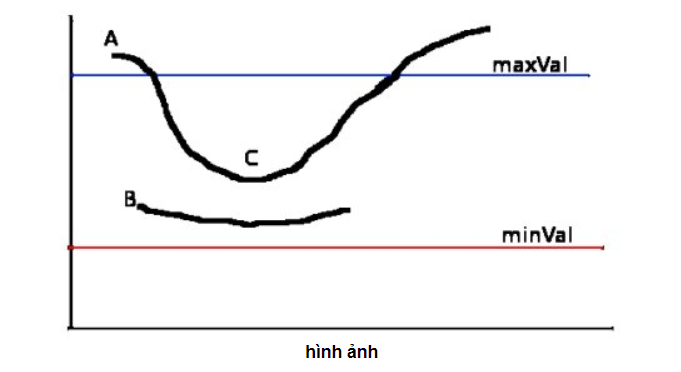

C·∫°nh A n·∫±m tr√™n maxVal, do ƒë√≥ ƒë∆∞·ª£c coi l√† "sure-edge". M·∫∑c d√π c·∫°nh C n·∫±m d∆∞·ªõi maxVal, nh∆∞ng n√≥ ƒë∆∞·ª£c k·∫øt n·ªëi v·ªõi c·∫°nh A, do ƒë√≥ c≈©ng ƒë∆∞·ª£c coi l√† c·∫°nh h·ª£p l·ªá v√† ch√∫ng ta c√≥ ƒë∆∞·ª£c ƒë∆∞·ªùng cong ƒë·∫ßy ƒë·ªß ƒë√≥. Nh∆∞ng c·∫°nh B, m·∫∑c d√π n·∫±m tr√™n minVal v√† n·∫±m trong c√πng v√πng v·ªõi c·∫°nh C, nh∆∞ng n√≥ kh√¥ng ƒë∆∞·ª£c k·∫øt n·ªëi v·ªõi b·∫•t k·ª≥ "sure-edge" n√†o, do ƒë√≥ b·ªã lo·∫°i b·ªè. V√¨ v·∫≠y, ƒëi·ªÅu r·∫•t quan tr·ªçng l√† ch√∫ng ta ph·∫£i ch·ªçn minVal v√† maxVal t∆∞∆°ng ·ª©ng ƒë·ªÉ c√≥ ƒë∆∞·ª£c k·∫øt qu·∫£ ch√≠nh x√°c.

Giai ƒëo·∫°n n√†y c≈©ng lo·∫°i b·ªè c√°c ƒëi·ªÉm ·∫£nh nhi·ªÖu nh·ªè d·ª±a tr√™n gi·∫£ ƒë·ªãnh r·∫±ng c√°c c·∫°nh l√† c√°c ƒë∆∞·ªùng d√†i.

V·∫≠y th√¨ cu·ªëi c√πng ch√∫ng ta c√≥ ƒë∆∞·ª£c c√°c c·∫°nh s·∫Øc n√©t trong h√¨nh ·∫£nh.

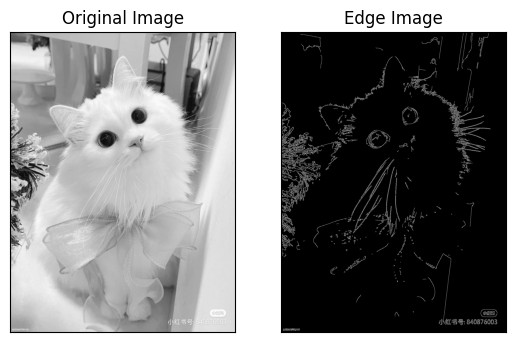

In [110]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('1.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()

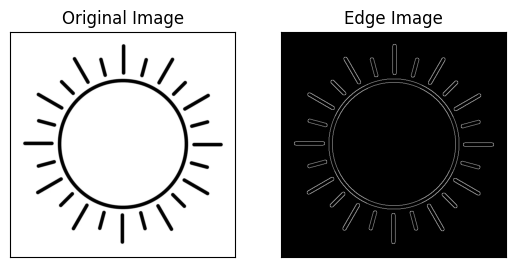

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
 
img = cv.imread('sun.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None, "file could not be read, check with os.path.exists()"
edges = cv.Canny(img,100,200)
 
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
 
plt.show()